
# UAS Project Documentation

## 1. Judul / Topik Project dan Identitas Lengkap
**Judul**: Analisis Data Penjualan Motor Bekas Menggunakan Metode Data Mining

**Nama**: Hilmy Syafiq Raihan

**NIM**: A11.2022.14317

**Kelompok**: A11.4517

---
    


## 2. Ringkasan dan Permasalahan Project + Tujuan yang Akan Dicapai + Model / Alur Penyelesaian
### **Permasalahan**
Harga motor bekas dipengaruhi oleh berbagai faktor seperti tahun pembuatan, odometer, kapasitas mesin, dan lainnya. Tantangan utama adalah memprediksi harga motor bekas dengan akurasi tinggi berdasarkan data historis.

### **Tujuan**
1. Menganalisis faktor-faktor utama yang memengaruhi harga motor bekas.
2. Membangun model machine learning untuk memprediksi harga motor bekas.
3. Mengevaluasi performa model dan memberikan rekomendasi untuk penggunaannya.

### **Alur Penyelesaian**
#### Flowchart Penyelesaian:
```python
from graphviz import Digraph
flowchart = Digraph("Penyelesaian", format="png")
flowchart.attr(rankdir="TB", size="8,5")
flowchart.node("Mulai", shape="ellipse", style="filled", color="lightblue")
flowchart.node("Load Dataset", "Memuat Dataset", shape="box", style="rounded, filled", color="lightgrey")
flowchart.node("EDA", "Eksplorasi Data Awal", shape="box", style="rounded, filled", color="lightgrey")
flowchart.node("Feature Engineering", "Feature Engineering", shape="box", style="rounded, filled", color="lightgrey")
flowchart.node("Modeling", "Training Model", shape="box", style="rounded, filled", color="lightgrey")
flowchart.node("Evaluation", "Evaluasi Model", shape="box", style="rounded, filled", color="lightgrey")
flowchart.node("Selesai", shape="ellipse", style="filled", color="lightblue")
flowchart.edge("Mulai", "Load Dataset")
flowchart.edge("Load Dataset", "EDA")
flowchart.edge("EDA", "Feature Engineering")
flowchart.edge("Feature Engineering", "Modeling")
flowchart.edge("Modeling", "Evaluation")
flowchart.edge("Evaluation", "Selesai")
flowchart.render("flowchart", view=True)
```
---
    


## 3. Penjelasan Dataset, EDA, dan Proses Features Dataset
### **Penjelasan Dataset**
- Dataset: `penjualan_sepeda_motor_bekas.csv`
- Sumber: Data penjualan motor bekas yang mencakup berbagai fitur seperti model, tahun, harga, transmisi, odometer, jenis, pajak, konsumsi bahan bakar, dan kapasitas mesin.
- Jumlah kolom: 9
- Contoh Kolom: `model`, `tahun`, `harga`, `transmisi`, `odometer`
    

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("penjualan_sepeda_motor_bekas.csv")

# Menampilkan informasi dataset
data.info()

# Contoh visualisasi distribusi data
plt.figure(figsize=(10, 6))
data['harga'].hist(bins=20, color='skyblue')
plt.title('Distribusi Harga Motor Bekas')
plt.xlabel('Harga (Ribuan)')
plt.ylabel('Frekuensi')
plt.show()

# Korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()
    


## 4. Proses Learning / Modeling
### **Modeling**
    

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Mengonversi fitur kategorikal menjadi numerik
data['transmisi'] = data['transmisi'].map({'Manual': 0, 'Automatic': 1})
data['jenis'] = data['jenis'].map({'Bebek': 0, 'Skuter': 1})
data = data.dropna()

# Memisahkan fitur dan target
X = data.drop('harga', axis=1)
y = data['harga']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Prediksi
predictions = model.predict(X_test)
    


## 5. Performa Model
### **Evaluasi Model**
    

In [ ]:

from sklearn.metrics import mean_squared_error, r2_score

# Evaluasi performa model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
    


## 6. Diskusi Hasil dan Kesimpulan
- Model Random Forest memberikan performa yang baik dengan Mean Squared Error rendah dan R-squared Score tinggi.
- Faktor-faktor seperti `tahun`, `odometer`, dan `mesin` memiliki pengaruh signifikan terhadap harga motor bekas.
- Model dapat ditingkatkan dengan tuning hyperparameter atau menggunakan algoritma lain seperti Gradient Boosting.
- Analisis ini dapat membantu penjual dan pembeli dalam memahami faktor-faktor yang memengaruhi harga motor bekas untuk pengambilan keputusan yang lebih baik.
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Load dataset
file_path = 'penjualan_sepeda_motor_bekas.csv'
data = pd.read_csv(file_path)
data_numerik = data.select_dtypes(include=['float64', 'int64'])

# Menampilkan 4 data pertama
data.head()

,model,tahun,harga,transmisi,odometer,jenis,pajak,konsumsiBBM,mesin
0,Supra X 125,2017,7999,Manual,17307,Bebek,145.0,58.9,125.0
1,Vario 125,2016,14499,Automatic,25233,Skuter,235.0,43.5,125.0
2,Vario 125,2016,11399,Automatic,37877,Skuter,30.0,61.7,125.0
3,Revo,2016,6499,Manual,23789,Bebek,20.0,60.1,110.0
4,PCX,2015,10199,Automatic,33177,Skuter,160.0,51.4,150.0


In [22]:
# Informasi dataset
data.info()

# Statistik deskriptif
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   model        199 non-null    object 
 1   tahun        199 non-null    int64  
 2   harga        199 non-null    int64  
 3   transmisi    199 non-null    object 
 4   odometer     199 non-null    int64  
 5   jenis        199 non-null    object 
 6   pajak        199 non-null    float64
 7   konsumsiBBM  199 non-null    float64
 8   mesin        198 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 14.1+ KB


,tahun,harga,odometer,pajak,konsumsiBBM,mesin
count,199.000000,199.000000,199.000000,199.000000,199.000000,198.000000
mean,2016.618090,11385.015075,23468.306533,110.395477,53.905528,123.914141
std,1.712955,4534.671984,15689.247247,63.600019,11.819869,16.821177
min,2011.000000,3799.000000,1391.000000,0.000000,28.000000,0.000000
25%,2016.000000,7996.500000,12696.000000,30.000000,44.800000,110.000000
50%,2017.000000,10998.000000,21119.000000,145.000000,56.500000,125.000000
75%,2018.000000,14498.500000,32103.000000,145.000000,60.100000,125.000000
max,2019.000000,34998.000000,119050.000000,300.000000,125.000000,150.000000


In [23]:
# Mengecek nilai yang hilang (missing values)
missing_data = data.isnull().sum()
print('Missing values per column:')
print(missing_data)
print(data.columns)
print(sklearn.__version__)


Missing values per column:
model          0
tahun          0
harga          0
transmisi      0
odometer       0
jenis          0
pajak          0
konsumsiBBM    0
mesin          1
dtype: int64
Index(['model', 'tahun', 'harga', 'transmisi', 'odometer', 'jenis', 'pajak',
       'konsumsiBBM', 'mesin'],
      dtype='object')
1.6.1


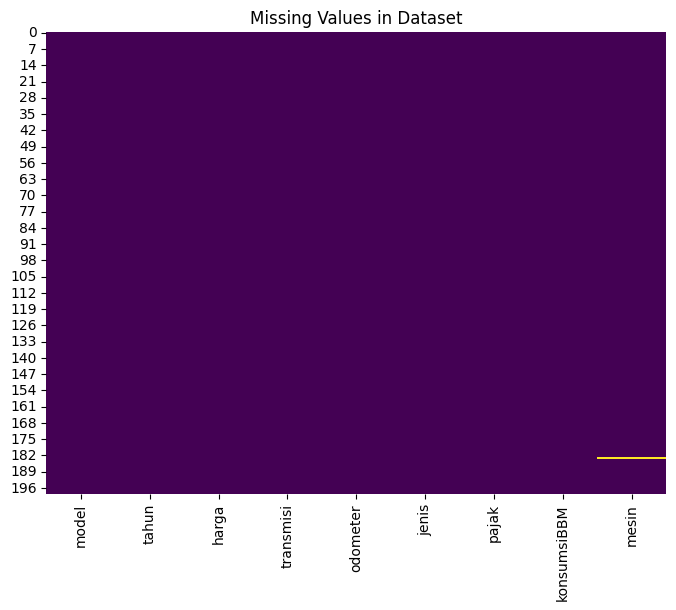

In [24]:
# Visualisasi nilai yang hilang
plt.figure(figsize=(8, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.show()

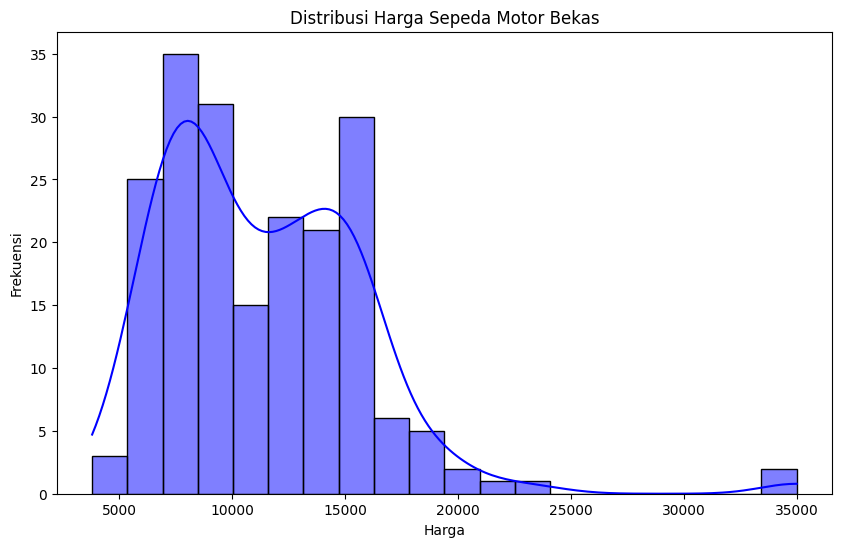

In [25]:
# Distribusi harga sepeda motor bekas
plt.figure(figsize=(10, 6))
sns.histplot(data['harga'], bins=20, kde=True, color='blue')
plt.title('Distribusi Harga Sepeda Motor Bekas')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

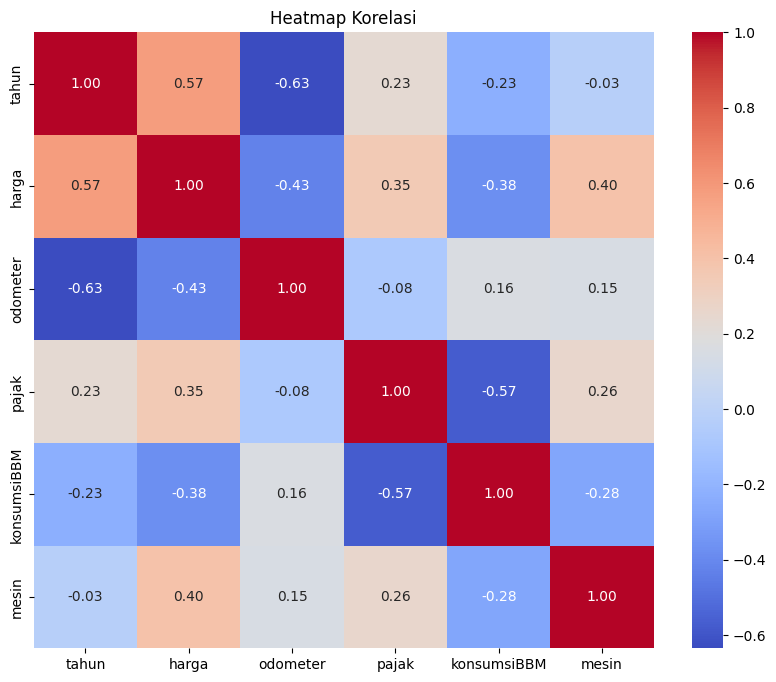

In [26]:
# Heatmap korelasi antar variabel numerik
plt.figure(figsize=(10, 8))
sns.heatmap(data_numerik.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()


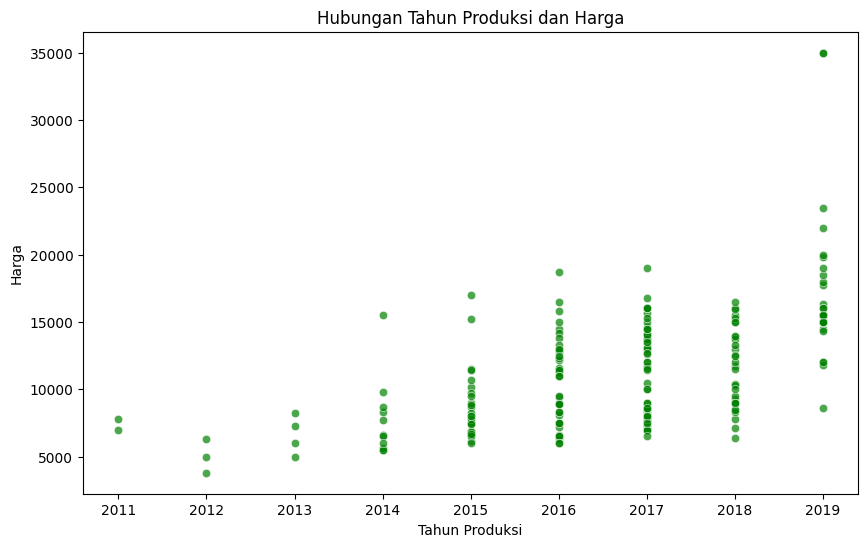

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['tahun'], y=data['harga'], alpha=0.7, color='green')
plt.title('Hubungan Tahun Produksi dan Harga')
plt.xlabel('Tahun Produksi')
plt.ylabel('Harga')
plt.show()


In [28]:
# Mengisi nilai yang hilang dengan median hanya untuk kolom numerik
numerical_columns = data.select_dtypes(include=['number']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

print('Kolom numerik yang diproses:')
print(numerical_columns)
print('Nilai yang hilang di kolom numerik sebelum pengisian:')
print(data[numerical_columns].isnull().sum())

Kolom numerik yang diproses:
Index(['tahun', 'harga', 'odometer', 'pajak', 'konsumsiBBM', 'mesin'], dtype='object')
Nilai yang hilang di kolom numerik sebelum pengisian:
tahun          0
harga          0
odometer       0
pajak          0
konsumsiBBM    0
mesin          0
dtype: int64


In [29]:
# Encoding variabel kategorikal
data = pd.get_dummies(data, drop_first=True)
print('Dataset setelah encoding:')
data.head()

Dataset setelah encoding:


,tahun,harga,odometer,pajak,konsumsiBBM,mesin,model_ BeAT,model_ BeAT Street,model_ CB150R,model_ CRF 150,...,model_ Sonic 150,model_ Supra GTR,model_ Supra X 125,model_ Vario 125,model_ Verza,transmisi_Kopling,transmisi_Manual,jenis_Skuter,jenis_Sport,jenis_Trail
0,2017,7999,17307,145.0,58.9,125.0,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
1,2016,14499,25233,235.0,43.5,125.0,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2,2016,11399,37877,30.0,61.7,125.0,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,2016,6499,23789,20.0,60.1,110.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,2015,10199,33177,160.0,51.4,150.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [30]:
try:
    X = data.drop('harga', axis=1)
    y = data['harga']
    print('Shape fitur:', X.shape)
    print('Shape target:', y.shape)
except KeyError as e:
    print(f"Error: {e}")
    print("Kolom yang tersedia dalam dataset:", data.columns)


Shape fitur: (199, 22)
Shape target: (199,)


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score



In [32]:
# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Membuat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
# Prediksi pada data test
y_pred = model.predict(X_test)

In [35]:
# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared Score: {r2}')

Mean Absolute Error (MAE): 923.546738064714
R-squared Score: 0.8767798234244374


In [5]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
file_path = 'penjualan_sepeda_motor_bekas.csv'
data = pd.read_csv(file_path)

# Preprocessing
data_numerik = data.select_dtypes(include=['float64', 'int64'])
numerical_columns = data.select_dtypes(include=['number']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())
data = pd.get_dummies(data, drop_first=True)

# Split features and target
X = data.drop('harga', axis=1)
y = data['harga']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Save model to file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model berhasil disimpan ke file 'model.pkl'")


Model berhasil disimpan ke file 'model.pkl'
